In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import keras 
import matplotlib.pyplot as plt 
import cv2 
import os
import numpy as np

In [24]:
batch_size = 10
height = 224
width = 224

In [25]:
train_data = tf.keras.utils.image_dataset_from_directory(
   'Data/train2',
   validation_split=0.2,
   subset='training',
   seed = 123,
   image_size = (height, width),
   batch_size=batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
   'Data/train2',
   validation_split=0.2,
   subset='validation',
   seed = 123,
   image_size = (height, width),
   batch_size=batch_size
)

Found 83 files belonging to 2 classes.
Using 67 files for training.
Found 83 files belonging to 2 classes.
Using 16 files for validation.


In [26]:
#splitting the validation dataset to create seperate testing data set
val_batches = tf.data.experimental.cardinality(validation_data)
test_data = validation_data.take(val_batches // 2)
validation_data = validation_data.skip(val_batches // 2)

In [27]:
class_names = train_data.class_names
class_names

['Electric Guitar', 'Saxophone']

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
normalization_layer = layers.Rescaling(1./225)

In [30]:
num_classes = len(class_names)

model = Sequential([
   layers.Rescaling(1./225, input_shape=(height, width, 3)),
   layers.Conv2D(16, 3, padding='same', activation='relu'),
   layers.MaxPooling2D(),
   layers.Conv2D(32, 3, padding='same', activation='relu'),
   layers.MaxPooling2D(),
   layers.Conv2D(64, 3, padding='same', activation='relu'),
   layers.MaxPooling2D(),
   layers.Flatten(),
   layers.Dense(128, activation='relu'),
   layers.Dense(num_classes)
])

In [31]:
model.compile(
   optimizer='adam',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
   metrics=['accuracy']
)

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)       

In [33]:
epochs = 10
history = model.fit(
   train_data,
   validation_data=validation_data,
   epochs=epochs
)

Epoch 1/10
7/7 [==============================] - 4s 294ms/step - loss: 1.7616 - accuracy: 0.5522 - val_loss: 1.2418 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 1s 199ms/step - loss: 0.6775 - accuracy: 0.6716 - val_loss: 0.6382 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 1s 210ms/step - loss: 0.5474 - accuracy: 0.6716 - val_loss: 0.5646 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 1s 202ms/step - loss: 0.4703 - accuracy: 0.6716 - val_loss: 0.4694 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 2s 230ms/step - loss: 0.3581 - accuracy: 0.8060 - val_loss: 0.4299 - val_accuracy: 0.6667
Epoch 6/10
7/7 [==============================] - 1s 168ms/step - loss: 0.2851 - accuracy: 0.9254 - val_loss: 0.3427 - val_accuracy: 0.8333
Epoch 7/10
7/7 [==============================] - 1s 147ms/step - loss: 0.2147 - accuracy: 0.9851 - val_loss: 0.1979 - val_accuracy: 1.0000
Epoch 8/10
7/7 [====

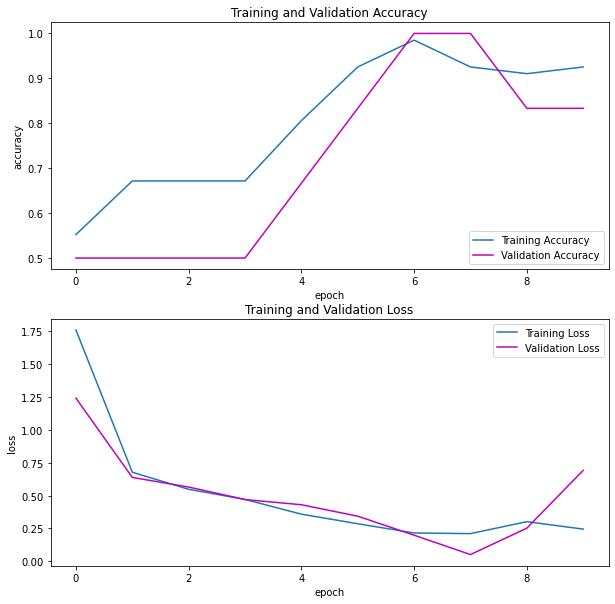

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='m')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='m')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [35]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(height,
                                  width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [36]:
loss0, accuracy0 = model.evaluate(test_data)
print(accuracy0)

1/1 [==============================] - 0s 414ms/step - loss: 0.5851 - accuracy: 0.8000
0.800000011920929


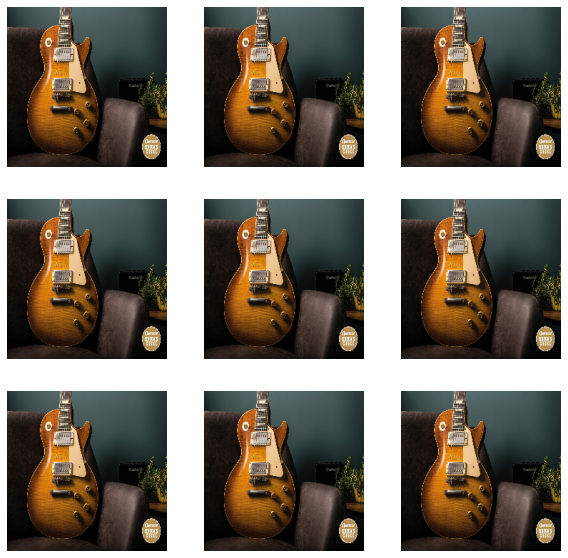

In [37]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [38]:

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                 

In [41]:
epochs = 10
history = model.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs,
 
)

Epoch 1/10
7/7 [==============================] - 3s 252ms/step - loss: 1.5204 - accuracy: 0.4328 - val_loss: 0.7056 - val_accuracy: 0.3333
Epoch 2/10
7/7 [==============================] - 1s 205ms/step - loss: 0.6613 - accuracy: 0.6866 - val_loss: 0.7485 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 1s 206ms/step - loss: 0.6228 - accuracy: 0.6716 - val_loss: 0.7475 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 1s 182ms/step - loss: 0.5999 - accuracy: 0.6716 - val_loss: 0.6735 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 1s 194ms/step - loss: 0.5695 - accuracy: 0.6716 - val_loss: 0.6551 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 2s 213ms/step - loss: 0.5224 - accuracy: 0.6716 - val_loss: 0.6223 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 1s 185ms/step - loss: 0.5105 - accuracy: 0.6716 - val_loss: 0.5744 - val_accuracy: 0.5000
Epoch 8/10
7/7 [====

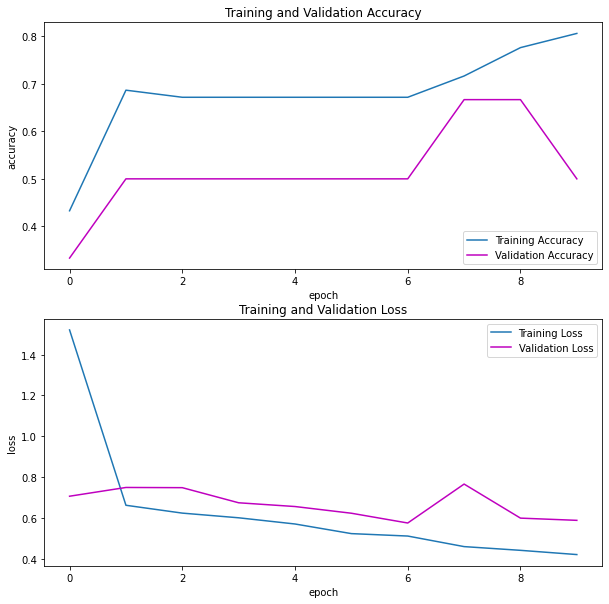

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='m')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='m')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
loss, accuracy = model.evaluate(test_data)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 346ms/step - loss: 0.4142 - accuracy: 0.6000
Test accuracy : 0.6000000238418579


Predictions:
 [0 0 1 1 1 0 0 0 1 0]
Labels:
 [0 0 0 1 1 1 0 1 1 1]


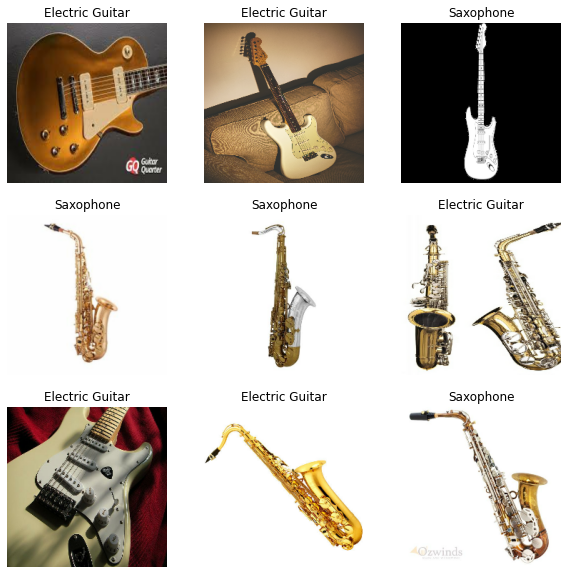

In [44]:
# test_directory = 'Data/test'

# for i in os.listdir(test_directory):
#    img = image.load_img(test_directory+'//'+i, target_size=(224,224))
#    plt.imshow(img)
#    plt.show()
   
#    X = image.img_to_array(img)
#    X = np.expand_dims(X, axis=0)
#    images = np.vstack([X])
#    val = model.predict(images)
#    score = np.argmax(tf.nn.softmax(val[0]))
#    if(score==0):
#       print('stratocaster')
#    else:
#       print('violin')

# Retrieve a batch of images from the test set
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()[1::2]

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")
